## KABEHO SAMANTHA
## M24B13/027


## IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sms


## IMPORTING DATASET

In [2]:
work= pd.read_excel("HousingData.xlsx")

In [3]:
work.head()

,PID,CRIM,AC,INDUS,LS,PR,RM,AGE,DIS,RAD,PTRATIO,DMT,LSTAT,MO,TAX
0,101,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98,2.0,296.0
1,102,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14,2.0,242.0
2,103,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,292.40,4.03,3.0,242.0
3,104,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94,0.0,222.0
4,105,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33,0.0,222.0


In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
import sklearn.model_selection

In [23]:
!pip install scikit-learn

  Using cached scikit_learn-1.5.2-cp313-cp313-win_amd64.whl.metadata (13 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp313-cp313-win_amd64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

## PROCESSING DATA

# Handle missing values,encode categorical variables and standardize features if necessary

# Droping rows with missing values 'TAX' Values

In [9]:
work.dropna(subset=['TAX'], inplace=True)

# Handling missing values for other columns

In [10]:
work.fillna(0, inplace=True)

# Ecoding  Categorical values

In [11]:
work = pd.get_dummies(work)

## DEFINING FEATURES AND TARGET VARIABLES
# Select the features independent variables and the target variable TAX.

In [12]:
x = work.drop('TAX', axis=1) # These are the features
y = work['TAX'] # These are the target variables

## SPLITING THE DATA 
# Split the dataset into training and testing sets.

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.2,random_state=42)

## TRAIN THE REGRESSION MODEL
# Creating the linear regression ,model.

In [14]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

## MAKE PREDICTIONS
# Using the trained model to make predictions on the test set.

In [15]:
y_pred = model.predict(X_test)

## EVALUATE THE MODEL.
# Evaluate the model performance using metrics

In [16]:
mse = mean_squared_error(Y_test,y_pred)
r2 =r2_score(Y_test,y_pred)
print(f"mean squared error:{mse}")
print(f"r2 score:{r2}")

mean squared error:4676.737871525952
r2 score:0.8371503008222756


## VISUALIZING THE RESULTS.
# Ploting the the predicted vs actual values

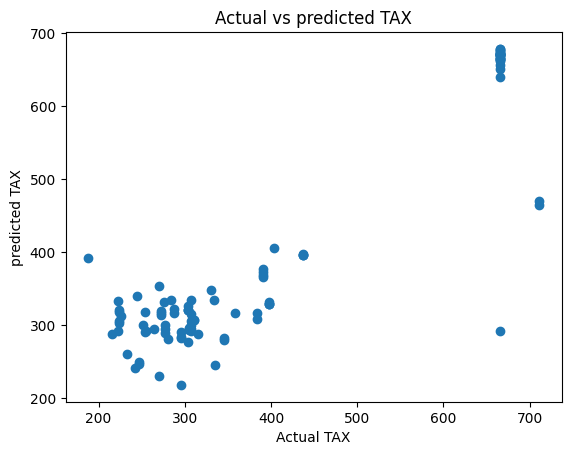

In [17]:
plt.scatter(Y_test,y_pred)
plt.xlabel('Actual TAX')
plt.ylabel('predicted TAX')
plt.title('Actual vs predicted TAX')
plt.show()

## SAVING  THE MODEL USING A PICKLE FILE.

In [18]:
import pickle
# Saving the model to a pickle file
model_name = 'tax_property.pkl' 
with open(model_name, 'wb') as file:
    pickle.dump(model, file)
print(f"The model has been as saved {model_name}")


The model has been as saved tax_property.pkl


## LOADING THE MODEL FOR VERIFICATION
# Ensuring that the model is saved
# Load the model from the pickle file

In [19]:
with open(model_name, 'rb') as file:
    loaded_model = pickle.load(file)

# Test the loaded model

In [20]:
y_pred_loaded =loaded_model.predict(X_test)
print(f"Loaded_model MSE: {mean_squared_error(Y_test,y_pred_loaded)}")

Loaded_model MSE: 4676.737871525952
